Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

## PEC00025: Introdução à Teoria de Vibrações
## Trabalho 1 - Resposta de um sistema com 1 grau de liberdade a uma excitação na base: espectro de pseudo acelerações e periodograma

Nome: Lucas Corona de Oliveira   
Matrícula: 00316465

[1. Introdução](#section_1)  
[2. Registro de acelerações](#section_2)  
[3. Método de Duhamel](#section_3)  
[4. Espectro de pseudo-acelerações](#section_4)  
[5. Periodograma](#section_5)  
[6. Considerações finais](#section_6)

### 1. Introdução <a name="section_1"></a>   
O trabalho em questão tem como objetivo analisar a resposta de um sistema com um grau de liberdade a uma excitação na base. Para tal, efetuou-se a medição da vibração de um modelo estrutural com o intuito de obter registros da aceleração ao longo do tempo. Em posse desta medição e da definição de condições inicias do sistema, é possível desenvolver o espectro de resposta de pseudo-acelerações e também estimar os periodogramas de entrada – acelerograma – e de saída – resposta à uma frequência específica. 

O procedimento para a geração dos resultados será desenvolvido ao longo do trabalho através da linguagem de programação "Python". Para isso, é necessário importar alguns pacotes básicos pré determinados para a linguagem, assim permitindo cálculos de funções matemáticas, analise de dados e a criação de gráficos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

### 2. Registro de acelerações <a name="section_2"></a>   
A medição foi realizada pelo aplicativo para Android "iNVH (Bosch)" em uma cama elástica, enquanto utilizada por uma criança. O aplicativo mede a aceleração ao longo do tempo nos eixos x, y e z. O sensor do app foi ajustado para o modo Fastest para gerar medições de aceleração com a maior precisão disponível no smartphone.   

A seguir temos os gráficos gerados com os dados de aceleração obtidos diretamente pelo aplicativo.

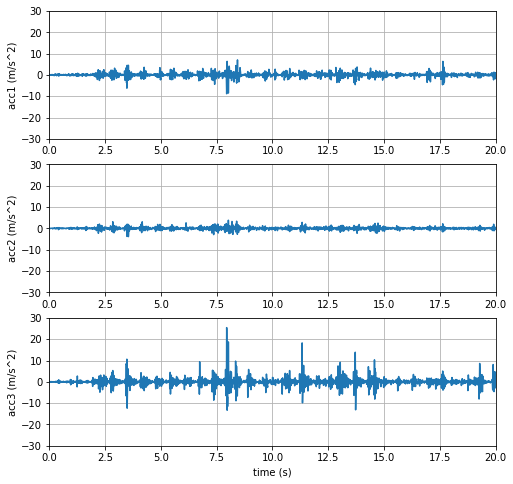

In [3]:
data = MRPy.from_file('data/Camaelastica', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-30, 30);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Para o trabalho em questão, temos interesse apenas na aceleração vertical, mantendo o sistema com apenas um grau de liberdade. Portanto, será utilizada apenas a aceleração ao longo do eixo z, que será isolado e os demais procedimentos serão aplicados apenas em função deste eixo.

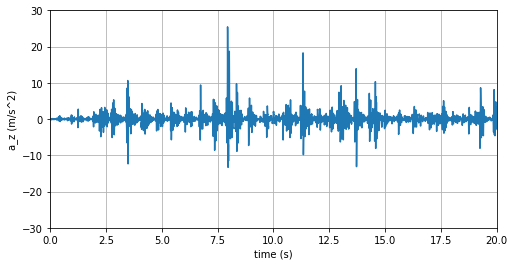

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

### 3. Método de Duhamel <a name="section_3"></a>   
Para encontrar uma solução numérica para a equação de equilíbrio dinâmico do sistema analisado, será empregado o método da Integral de Duhamel. Este método é utilizado para sistemas lineares e consiste na superposição de respostas, ou seja, na obtenção de respostas em um instante $t$ a partir de respostas em instantes anteriores. Portanto, permite calcular o deslocamento para cada instante do sistema.   

Para a realização dos cálculos, deve-se definir algumas condições iniciais do sistema fictício em análise.

Deslocamento máximo (m) = 0.0030537598800518067


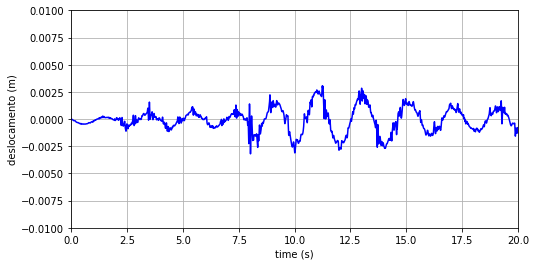

In [5]:
m  = 1.0       # massa kg
fn = 0.5       # frequência natural Hz
zt = 0.01      # amortecimento
u0 = 0.        # deslocamento inicial
v0 = 0.        # initial velocity

u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0], 'b')

plt.xlim(0, data.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.01, 0.01);   plt.ylabel('deslocamento (m)')
plt.grid(True)

print("Deslocamento máximo (m) =", u_DH.max())

### 4. Espectro de pseudo-acelerações <a name="section_4"></a>   

A partir do gráfico de deslocamentos, calcula-se o espectro de pseudo acelerações através da relação $a_p = w^2 u_p$, sendo $u_p$ o pico de deslocamento calculado em cada instante de tempo pelo algoritmo da Integral de Duhamel. O gráfico de pseudo acelerações fornece o valor máximo da resposta, medido em forma de aceleração $a_p$, para cada período $T$ de um sistema sujeito a forças externas.

Aceleração máxima (m/s²) = 89.75976753401801


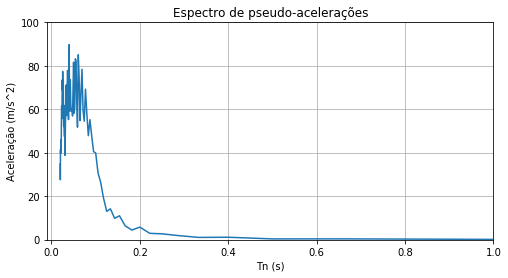

In [6]:
fn = 0.5    
n = 100

Tn = np.zeros(n)
Ap = np.zeros(n)

for x in range(0,n):
        
    fn += 0.5
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    wn = 2*np.pi*fn
    Ap[x] = (wn**2)*u_DH.max()
    Tn[x] = 1/fn
    
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(Tn, Ap)
plt.title("Espectro de pseudo-acelerações")

plt.xlim(-0.01, 1);        plt.xlabel('Tn (s)') 
plt.ylim(-0.1, 100);  plt.ylabel('Aceleração (m/s^2)') 
plt.grid(True)
print ("Aceleração máxima (m/s²) =", Ap.max())

### 5. Periodograma <a name="section_5"></a>   

A última etapa do trabalho consiste na elaboração dos periodogramas de entrada e de saída. Primeiramente, deve-se elaborar o periodograma de acelerações do sistema, que estima a densidade espectral referente à aceleração do eixo $z$ medida anteriormente.

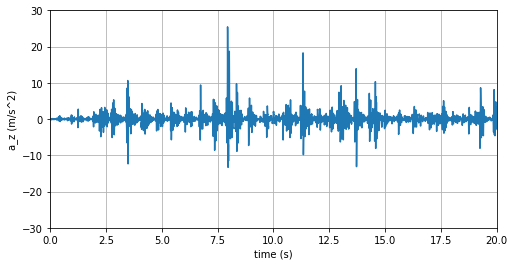

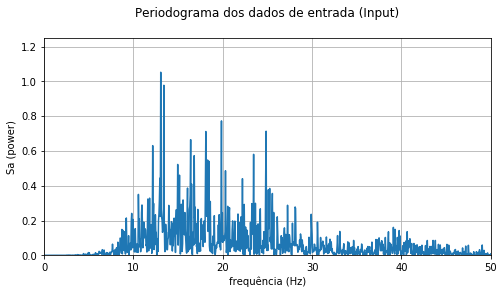

In [7]:
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, data.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 50);   plt.xlabel('frequência (Hz)') 
plt.ylim(0,  1.25);   plt.ylabel('Sa (power)') 
plt.title("Periodograma dos dados de entrada (Input)\n")
plt.grid(True)

Analisando o periodograma de entrada (Input), verifica-se que o maior pico de energia ocorre na região próxima dos 13 Hz, indicando que a frequência de vibração natural do sistema em estudo pode estar próxima deste valor.   

Finalmente, calcula-se o periodograma de resposta (Output) da estrutura. Para isto, utiliza-se os dados de saída, obtidos pela aplicação da Integral de Duhamel para um valor de frequência fixado como o valor da frequência dominante encontrada no periodograma de entrada.

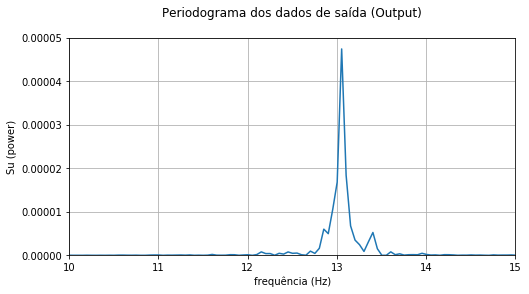

In [8]:
fmax = f[np.argmax(Saz[0])]

for x in range(0,n):
        
    u_DH = az.sdof_Duhamel(fmax, zt, u0, v0)/m

Su, fmax = u_DH.periodogram()
f       = u_DH.f_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(f, Su[0])

plt.xlim(10, 15);   plt.xlabel('frequência (Hz)') 
plt.ylim(0,  0.00005);   plt.ylabel('Su (power)') 
plt.title("Periodograma dos dados de saída (Output)\n")
plt.grid(True)

### 6. Considerações finais <a name="section_6"></a>   

Através da coleta de dados do aplicativo "iNVH" e da utilização das funções disponíveis na biblioteca MRPy, foi possível determinar o espectro de pseudo acelerações e o periodograma do sistema.    

O espectro de pseudo-aceleração permite visualizar, na veriação do período T, a amplitude máxima de aceleração de um sistema. Para o sistema de um grau de liberdade em estudo neste trabalho, o valor máximo encontrado foi de $89,76m/s^2$.   

Além disso, também foram calculados os periodogramas de aceleração vertical e da resposta do sistema. De acordo com os resultados, foi verificado que a frequência natural de vibração do sistema pode estar próxima dos $13Hz$.